In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct, select

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
measurement= Base.classes.measurement 

In [7]:
station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Climate Analysis

In [9]:
# Set up inspector to read tables columns in database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
#Checking the types of values in each table
measurement_col = inspector.get_columns('measurement')
for meas in measurement_col:
    print(meas['name'],meas['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
station_col = inspector.get_columns('station')
for stat in station_col:
    print(stat['name'],stat['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


### Precipitaion Analysis 

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
    #Query for the last date
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [13]:
    #Query for last 12 months of data and precipitation scores
tweleve = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >'2016-08-22').all()
tweleve

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(tweleve, columns=['Date','Precipitation'])
df.set_index('Date', inplace=True)
df

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


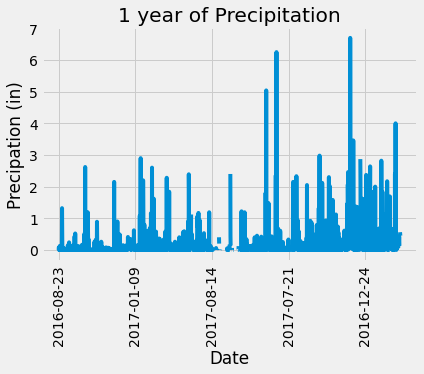

In [15]:
df['Precipitation'].plot()
plt.title("1 year of Precipitation")
plt.ylabel("Precipation (in)")
plt.xlabel("Date")
plt.xticks(rotation=90);


In [16]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html?highlight=autofmt_xdate
# Question: Why is the date formated odd

In [17]:
# Calcualte the summary statistics for the precipitation data
stats_precip = df['Precipitation'].describe()
stats_precip

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [18]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(station.station).all()
Total_stations = len(total_stations)
print(f"There are a total number of {Total_stations} stations available in the dataset.")

There are a total number of 9 stations available in the dataset.


In [19]:
# List the stations and the counts in descending order.
descending_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).\
    desc()).all()
descending_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#Most active station
active_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).\
    desc()).first()
active_station

('USC00519281', 2772)

In [21]:
#Query for the name of the most active station
top_station = session.query(station).filter(station.station =='USC00519281')
top_station

In [22]:
#For Loop for the most active station as variable
Top_station = []
for station in top_station:
    Top_station.append(station.name)
    
    print(station.name)

WAIHEE 837.5, HI US


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [24]:
#Query for the lowest temperature for most active station
waihee_min_temp = session.query(func.min(measurement.tobs)).\
    filter(station.station=='USC00519281').first()
print(f'The maxium temperature for {Top_station} station is {waihee_min_temp} degrees F')

The maxium temperature for ['WAIHEE 837.5, HI US'] station is (53.0,) degrees F


In [25]:
#Query for the highest for most active station
waihee_max_temp = session.query(func.max(measurement.tobs)).\
    filter(station.station=='USC00519281').first()
print(f'The maxium temperature for {Top_station} station is {waihee_max_temp} degrees F')

The maxium temperature for ['WAIHEE 837.5, HI US'] station is (87.0,) degrees F


In [26]:
#Query for average temperature for most active station
waihee_avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(station.station=='USC00519281').first()
print(f'The average temperature for {Top_station} station is {waihee_avg_temp} degress F')

The average temperature for ['WAIHEE 837.5, HI US'] station is (73.09795396419437,) degress F


In [27]:
temp_max= waihee_df['Temperature Observed'].max()
print(f'The highest temperature recorded for {station.name} is {temp_max} degrees F.')

NameError: name 'waihee_df' is not defined

In [29]:
temp_min= waihee_df['Temperature Observed'].min()
print(f'The lowest temperature recorded for {station.name} is {temp_min} degrees F.')

The lowest temperature recorded for station.name is 54.0 degrees F.


In [30]:
temp_avg= waihee_df['Temperature Observed'].mean()
print(f'The average temperature recorded for {station.name} is {round(temp_avg,4)} degrees F.')

The average temperature recorded for station.name is 71.6638 degrees F.


In [52]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

waihee_obs = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >'2016-08-22').\
    filter(measurement.station == 'USC00519281').all()

waihee_obs

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [53]:
waihee_df = pd.DataFrame(waihee_obs,columns=['Date','tobs'])
waihee_df.set_index('Date', inplace=True)
waihee_df

,tobs
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


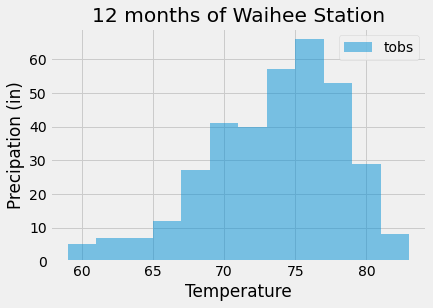

In [55]:
waihee_df.plot.hist(bins= 12, alpha=0.5)
plt.title("12 months of Waihee Station")
plt.ylabel("Precipation (in)")
plt.xlabel("Temperature");

# Temperatrue Analysis I 

##  1) Identify the average temperature in June and Decemeber at all stations across all available years in the dataset.
##  2) Use the t-test to determine whether the difference in the means, if any, is statistically significant.  Will you use a paired t-test or an unparied t-test? Why? 

In [51]:
session = Session(engine, True)


In [57]:
conn = e

NameError: name 'conn' is not defined

# Temperature Analysis II

## 1) Build a box plot to show statisitcal observation for temperature between a specific date range. 

# Daily Rainfall Average

## 1) Calculate teh rainfall per weather station using the previous year's matching dates. 
## 2) Calculate the daily normals. Normals are teh averages for the min, avg, and max temperatures.abs
## 3) Use the "daily_normals" function to create a list of trip dates in the %m-%d format.abs
## 4) Use Pandas to plot an area plot (stacked=False) for the daily normals. 